<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning_from_Scratch/blob/main/Final_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layer Explaination

In [358]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

In [359]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [360]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [361]:
image = train_x[0]

In [362]:
# 이미지 shape 확인
image.shape

(28, 28)

* 차원 수를 확인 
* MNIST의 데이터는 [batch size,height,width,channel]=[60000,28,28,1] 이었다.

# <font color='blue'>INPUT</font>   

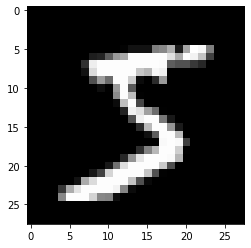

In [363]:
plt.imshow(image,'gray')
plt.show()

In [364]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]

In [365]:
image.shape

(1, 28, 28, 1)

# Feature Extraction

## Convolution

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

# 일부러 제로패딩을 주기위해  padding='SAME'으로 하자
- tf.keras.layers.Conv2D 내부구조를 분석하면 할 수 있을 듯??

### Visualization

- tf.keras.layers.Conv2D
- integer의 경우 모델에 들어가면 에러가나므로 float32로 변경해준다.

In [366]:
image = tf.cast(image, dtype=tf.float32)

In [367]:
layer = tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5), strides=(1, 1), padding='SAME')#,activation='tanh')
output = layer(image)

In [368]:
output

<tf.Tensor: shape=(1, 28, 28, 6), dtype=float32, numpy=
array([[[[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         ...,
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ,
            0.        

In [369]:
import numpy as np
np.min(image),np.max(image)

(0.0, 255.0)

In [370]:
np.min(output),np.max(output)

(-216.02338, 266.72607)

In [371]:
output.shape

TensorShape([1, 28, 28, 6])

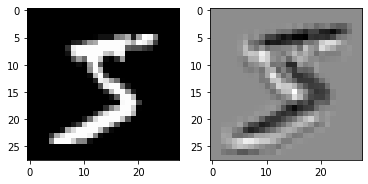

In [372]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

weight 불러오기

- layer.get_weights()

앞에는 weight, 뒤에는 bias이다.

In [373]:
weight=layer.get_weights()
len(weight)

2

In [374]:
weight[0].shape,weight[1].shape

((5, 5, 1, 6), (6,))

# 필터 시각화하기

In [375]:
weight[0].shape

(5, 5, 1, 6)

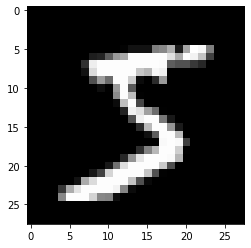

In [376]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

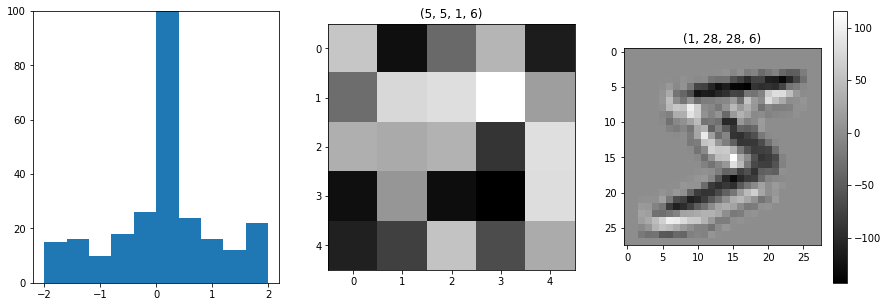

In [377]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

## Activation Function

In [378]:
act_output=tf.keras.activations.tanh(output)

In [379]:
act_output.shape

TensorShape([1, 28, 28, 6])

In [380]:
np.min(output), np.max(output)

(-216.02338, 266.72607)

In [381]:
np.min(act_output), np.max(act_output)

(-1.0, 1.0)

# <font color='blue'>C1 : feature map 6@28X28</font>   

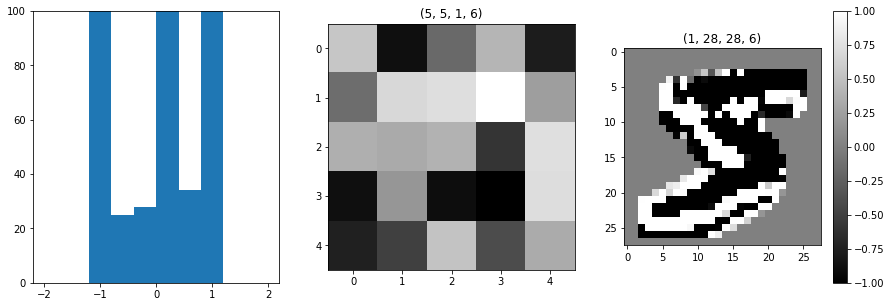

In [382]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

activation을 tanh를 썼기 때문에 텐서를 받으면 -1~1 사이의 값으로 모두 변환된다.

# 따라서 각 필터연산된 feature map을 모두 연산한 뒤에 다음레이어에 들어갈때 그 matrix에 activation function을 각 픽셀마다 곱해 연산해주는 것이다.
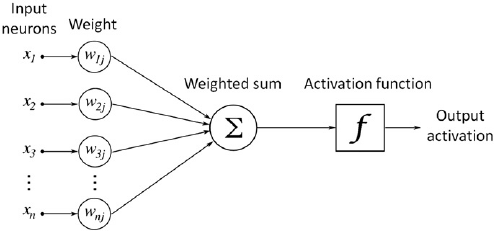

## Pooling

- tf.keras.layers.AveragePool2D

In [383]:
layer = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
output = layer(act_output)

# <font color='blue'>S2 : feature map 6@14X14</font>   

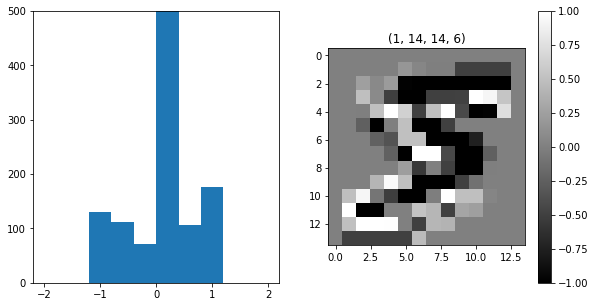

In [384]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

<font color='red'>1.여기(S2->C3)에 테이블 구조 CONVOLUTION 넣기!!!</font>   

In [385]:
layer = tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5), strides=(1, 1), padding='VALID',activation='tanh')
output=layer(output)

# <font color='blue'>C3 : feature map 16@10X10</font>   

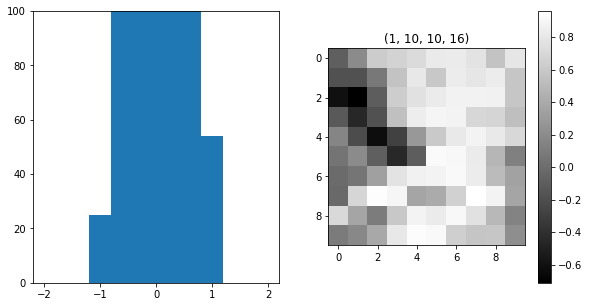

In [386]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [387]:
layer = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
output = layer(output)

POOLING

# <font color='blue'>S4 : feature map 16@5X5</font>   

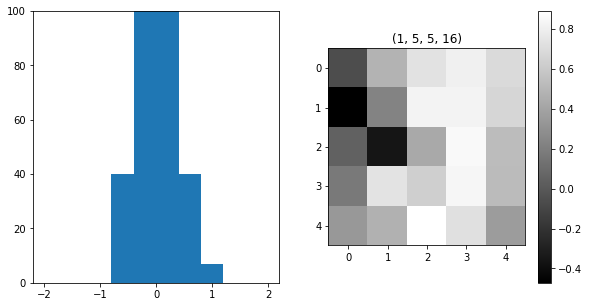

In [388]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Fully Connected

- tf.keras.layers.Flatten()

* S4->C5로 넘거가는과정? 단순히 Flatten은 아닐거 같다. 
* 120의 노드와 S4의 feature map과 연결해줘야하기 때문
* 현재는 단순히 S4를 Flatten 시켜줬기 때문에 16 x 5 x 5 = 400이 됐다.  

In [389]:
layer = tf.keras.layers.Flatten()
output = layer(output)

In [390]:
output.shape

TensorShape([1, 400])

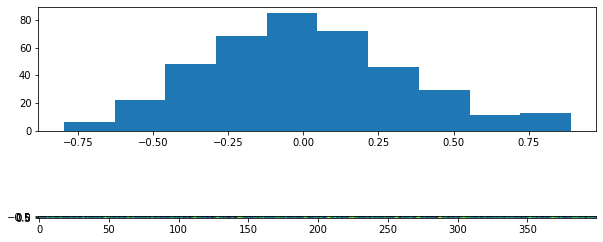

In [391]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:400])
plt.show()

## Dense

내보낼 유닛 개수를 120개로 설정하고 이 120개와 S4의 feature map 모두 연결한다는 뜻이된다.

In [392]:
layer = tf.keras.layers.Dense(120, activation='tanh')
output = layer(output)

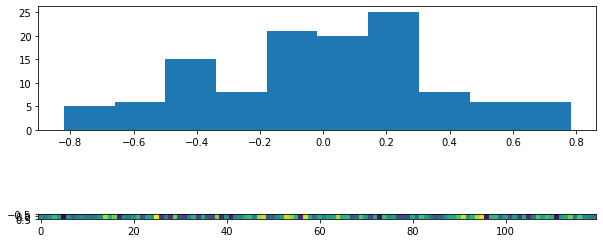

In [393]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:120])
plt.show()

In [394]:
layer = tf.keras.layers.Dense(84, activation='tanh')
output = layer(output)

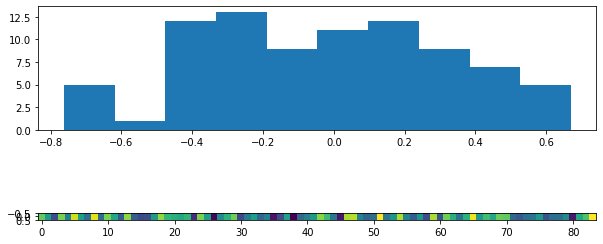

In [395]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:84])
plt.show()

In [396]:
layer = tf.keras.layers.Dense(10, activation='softmax')
output = layer(output)

<font color='red'>2. softmax가 아닌 RBF로 구현할 수 있나?</font> 

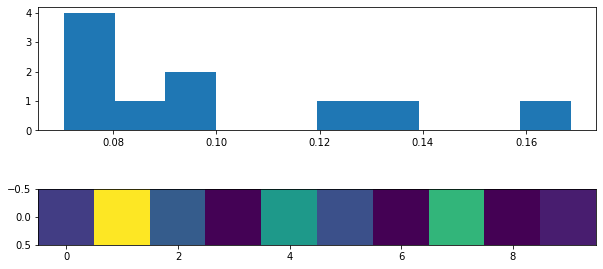

In [397]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:10])
plt.show()

가장 확률 높은값 찾기

In [398]:
output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08830754, 0.16869573, 0.09917063, 0.07109759, 0.12358428,
        0.09455534, 0.07058722, 0.13506697, 0.07047294, 0.07846171]],
      dtype=float32)>

In [399]:
result=np.argmax(output)
result

1

## DropOut

![image.png](attachment:image.png)

- tf.keras.layers.Dropout

In [ ]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 10])

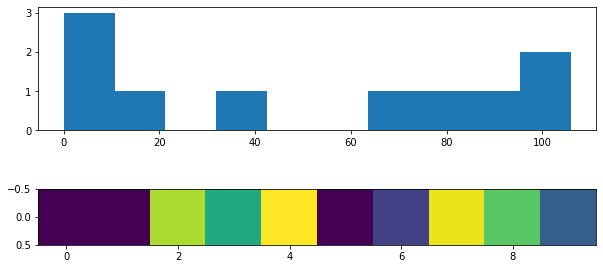

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

# Build Model

In [351]:
from tensorflow.keras import layers

In [352]:
input_shape = (28, 28, 1)

In [400]:
inputs = layers.Input(input_shape)
#32는 필터개수 
#feature extraction이며, 여기서는 전부 연결헀고 끝에 Dropout을 설정해줬다.
net = layers.Conv2D(6, (5, 5), padding='SAME')(inputs)
net = layers.Activation('tanh')(net)
net = layers.AveragePooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net) #LeNet Table 묘사
net = layers.Conv2D(16, (5, 5), padding='VALID')(net)
net = layers.Activation('tanh')(net)
net = layers.AveragePooling2D(pool_size=(2, 2))(net)

net = layers.Flatten()(net)
net = layers.Dense(120)(net)
net = layers.Activation('tanh')(net)

net = layers.Dense(84)(net)
net = layers.Activation('tanh')(net)

net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CVandAR')

## Summary

In [401]:
model.summary()

Model: "CVandAR"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_22 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_8 (Activation)    (None, 10, 10, 16)        0   